# Project & Student Details

**Project:** Employee Salary Prediction using Machine Learning  
**Student Name:** Akash Keote  
**Batch:** EDUNET FOUNDATION AICTE BATCH B2 AI 2025-2026  
**AICTE Internship Student Registration ID:** STU67e3fe6b79a3f1742995051  
**Student ID (Enrolment number):** 2223CPFBTCSE008  
**Email:** keoteakash@gmail.com  
**Contact Info:** +91-9307451323  
**College:** GH Raisoni College of Engineering and Management, Nagpur  
**Year:** 4th Year, BTech CSE

**About Me:**  
I am Akash Keote, currently learning in GH Raisoni College of Engineering and Management, Nagpur, 4th year of BTech CSE.

**Dataset Source:**  
[Kaggle - Salary Prediction for Beginner](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer?resource=download)

Acknowledgments
I learned all these concepts from:

- **Dr. Nanthini Mohan** (Lead Mentor, Edunet Foundation AICTE Internship)  
  [LinkedIn](https://www.linkedin.com/in/dr-nanthini-mohan-9a727a105/)
- **Chai aur Code** 
[Udemy Course](https://www.udemy.com/course/100-days-of-python/)
- **Code With Harry** 
[Udemy Course](https://www.udemy.com/course/codewithharry-python/)

Thank you for your guidance, tutorials, and inspiration throughout my learning journey!

In [1]:
# 1. Data Loading & Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Load data
df = pd.read_csv('Salary Data.csv')
df = df.dropna()

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.0

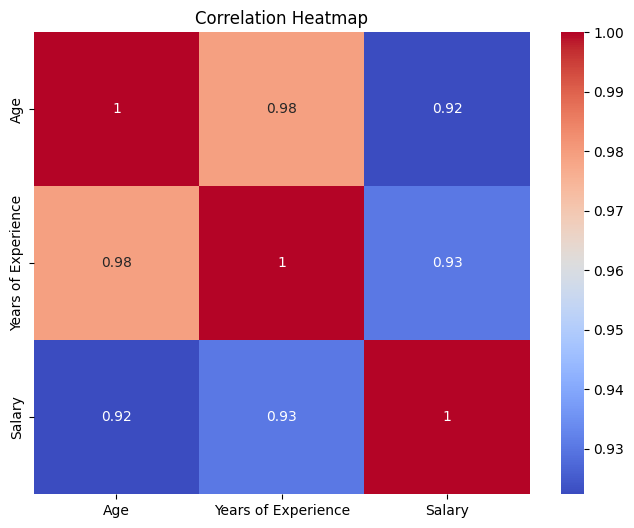

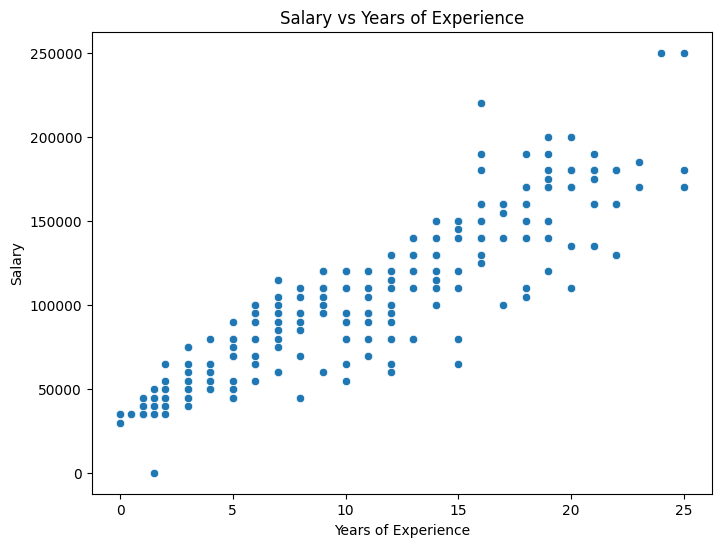

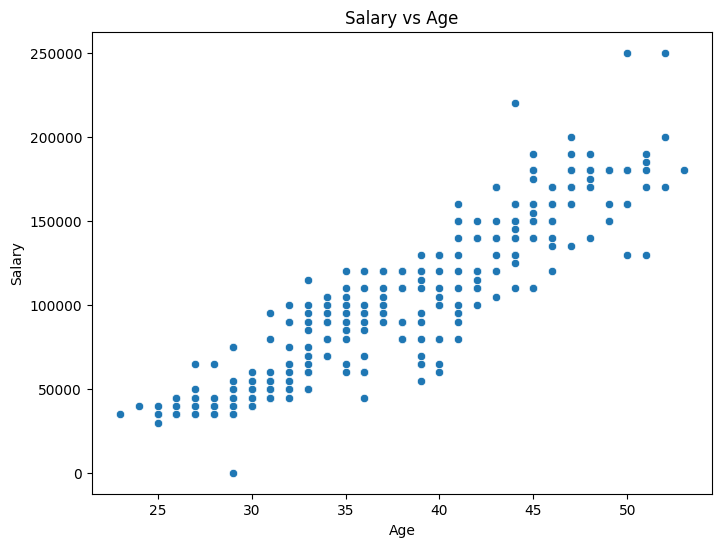

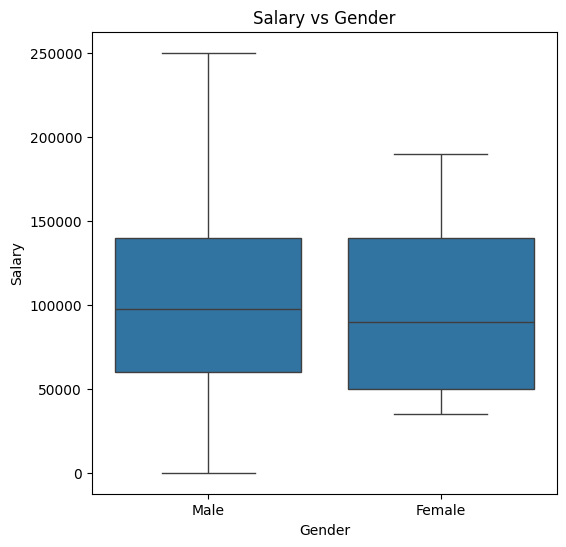

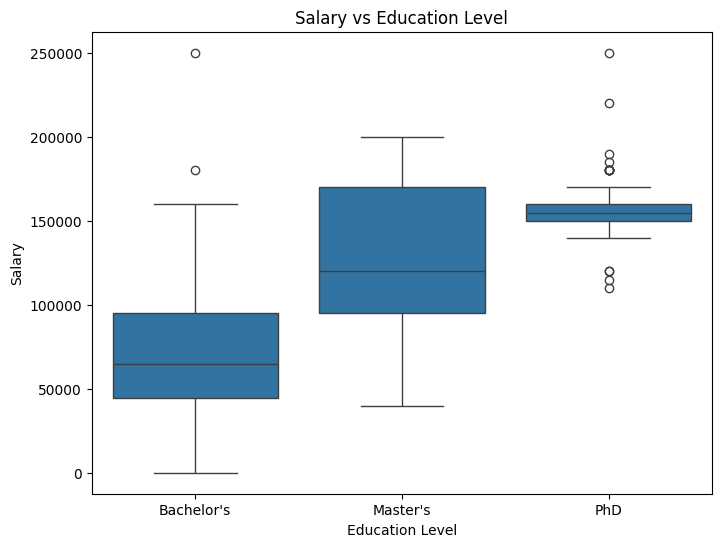

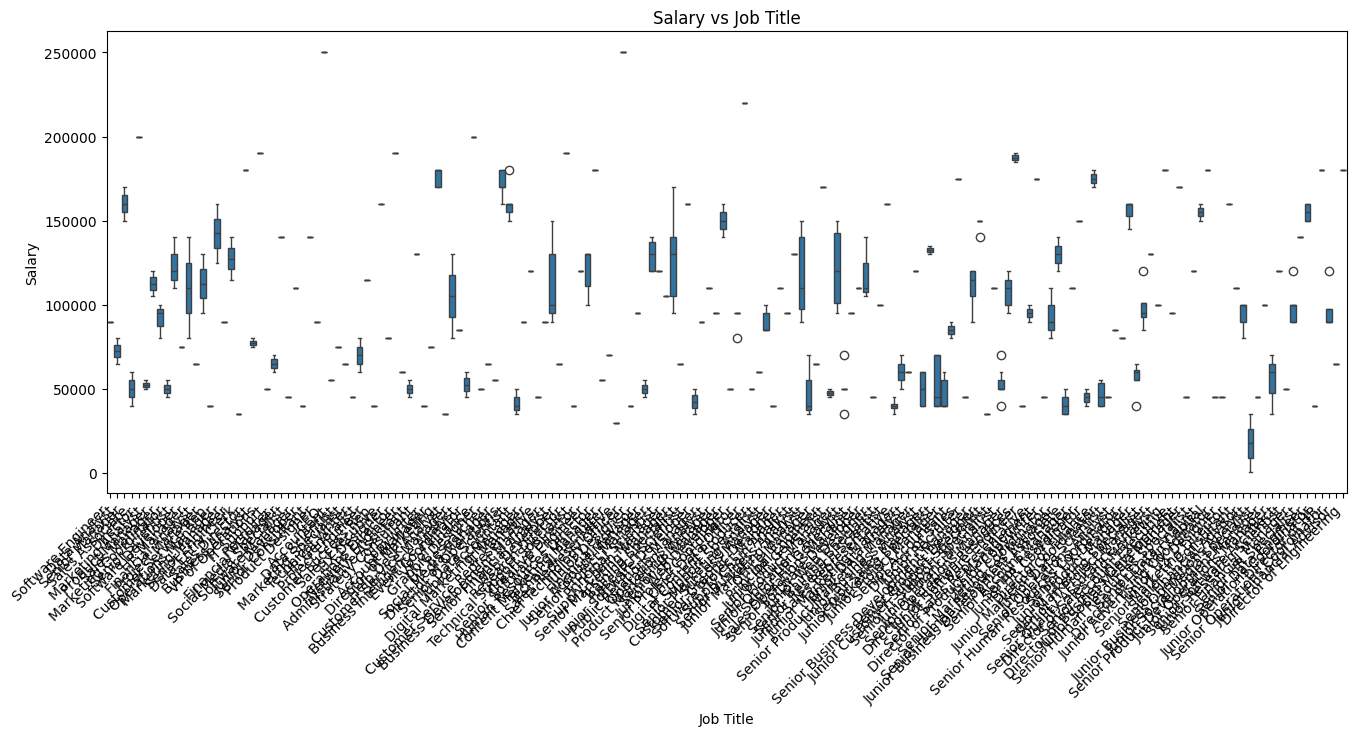

In [2]:
# 2. EDA
print(df.head())
print(df.describe())
print(df.info())

# Correlation heatmap (numeric features)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Salary vs Years of Experience
plt.figure(figsize=(8,6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary vs Years of Experience')
plt.show()

# Salary vs Age
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Salary vs Age')
plt.show()

# Salary vs Gender
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs Gender')
plt.show()

# Salary vs Education Level
plt.figure(figsize=(8,6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary vs Education Level')
plt.show()

# Salary vs Job Title
plt.figure(figsize=(16,6))
sns.boxplot(x='Job Title', y='Salary', data=df)
plt.title('Salary vs Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
# 3. Feature Engineering
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Polynomial Features for Age and Years of Experience
numeric_features = ['Age', 'Years of Experience']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_encoded[numeric_features])
poly_feature_names = poly.get_feature_names_out(numeric_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_encoded.index)

# 2. Drop original numeric columns and concat polynomial features
df_encoded = df_encoded.drop(columns=numeric_features)
df_encoded = pd.concat([df_encoded, df_poly], axis=1)

# 3. Interaction Feature
df_encoded['Age_x_Experience'] = df_poly['Age'] * df_poly['Years of Experience']

In [5]:
# 4. Train/Test Split
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import joblib
joblib.dump(list(X.columns), 'model_features.pkl')

['model_features.pkl']

In [6]:
# Remove outliers based on Salary (optional)
q_low = df['Salary'].quantile(0.01)
q_hi  = df['Salary'].quantile(0.99)
df = df[(df['Salary'] > q_low) & (df['Salary'] < q_hi)]


In [7]:
# 5. Model Training & Comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

import numpy as np  # Ensure numpy is imported

results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results.append({
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),  # <-- yahan change karo
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print('Model Comparison:')
print(results_df)


Model Comparison:
               Model  R2 Score          RMSE           MAE
0  Linear Regression  0.832978  20011.238676  11850.161123
1              Ridge  0.882537  16781.767880   9773.977221
2              Lasso  0.840320  19566.467412  11069.979846
3      Decision Tree  0.856939  18520.259177  11533.333333
4      Random Forest  0.903106  15241.794514   9684.666667


c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.192e+09, tolerance: 6.855e+07
  model = cd_fast.enet_coordinate_descent(


In [8]:


# Highlight best R2, lowest RMSE/MAE
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

styled_df = results_df.style.apply(highlight_max, subset=['R2 Score']) \
                            .apply(highlight_min, subset=['RMSE', 'MAE'])
display(styled_df)

,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.832978,20011.238676,11850.161123
1,Ridge,0.882537,16781.767880,9773.977221
2,Lasso,0.840320,19566.467412,11069.979846
3,Decision Tree,0.856939,18520.259177,11533.333333
4,Random Forest,0.903106,15241.794514,9684.666667


In [9]:
# import sys
# !{sys.executable} -m pip install tpot

In [10]:
from tpot import TPOTRegressor

# TPOT AutoML
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)

# TPOT ka best model ka score
print("TPOT Best Model Test R2:", tpot.score(X_test, y_test))

# TPOT ka best pipeline code dekhne ke liye
print("Best pipeline steps:")
print(tpot.fitted_pipeline_)

# (Optional) TPOT pipeline ko export bhi kar sakte ho
tpot.export('tpot_best_pipeline.py')

c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


                                                                             
Generation 1 - Current best internal CV score: -211856094.4169696
                                                                             
Generation 2 - Current best internal CV score: -211856094.4169696
                                                                             
Generation 3 - Current best internal CV score: -211856094.4169696
                                                                             
Generation 4 - Current best internal CV score: -211856093.07544917
                                                                              
Generation 5 - Current best internal CV score: -211856084.8844158
                                                                              
Best pipeline: RidgeCV(PCA(input_matrix, iterated_power=7, svd_solver=randomized))
TPOT Best Model Test R2: -281627706.76913214
Best pipeline steps:
Pipeline(steps=[('pca',
                 PCA(itera

In [11]:
# XGBoost Model
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))

XGBoost R2: 0.8899938114200734
XGBoost RMSE: 16240.347350769847
XGBoost MAE: 10130.851770833333


Top 10 Biggest Errors:


,Actual Salary,Predicted Salary,Absolute Error
30,250000.0,162908.859375,87091.140625
33,65000.0,99703.078125,34703.078125
72,190000.0,155318.390625,34681.609375
0,90000.0,55438.898438,34561.101562
108,100000.0,129745.906250,29745.906250
93,170000.0,198976.375000,28976.375000
347,180000.0,157459.125000,22540.875000
194,120000.0,98170.203125,21829.796875
196,90000.0,111573.687500,21573.687500
155,110000.0,129833.382812,19833.382812


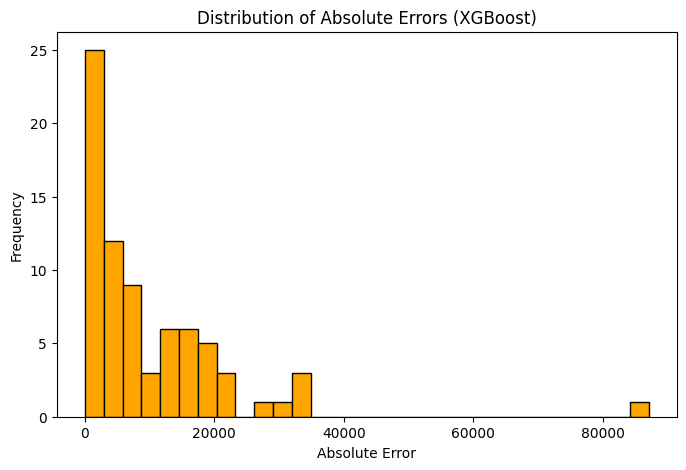

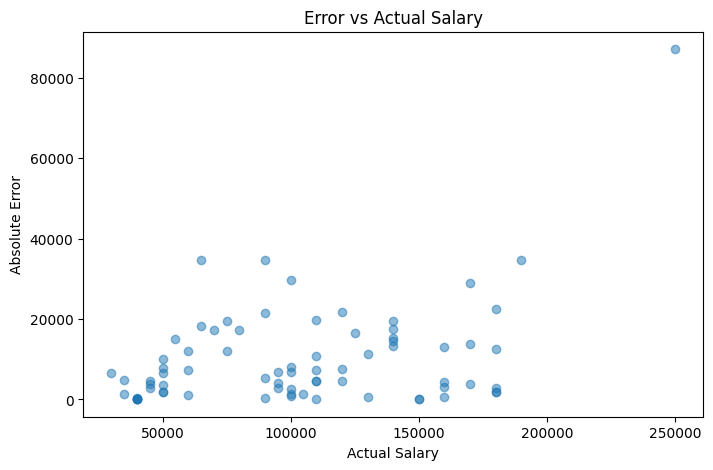

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Error analysis for XGBoost (or your best model)
errors = np.abs(y_test - y_pred_xgb)
error_df = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': y_pred_xgb,
    'Absolute Error': errors
})

# Top 10 biggest errors
top_errors = error_df.sort_values(by='Absolute Error', ascending=False).head(10)
print("Top 10 Biggest Errors:")
display(top_errors)

# Error distribution plot
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Absolute Errors (XGBoost)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

# Error vs Actual Salary plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, errors, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Absolute Error')
plt.title('Error vs Actual Salary')
plt.show()

C:\Users\AkashK\AppData\Local\Temp\ipykernel_14584\3448509832.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


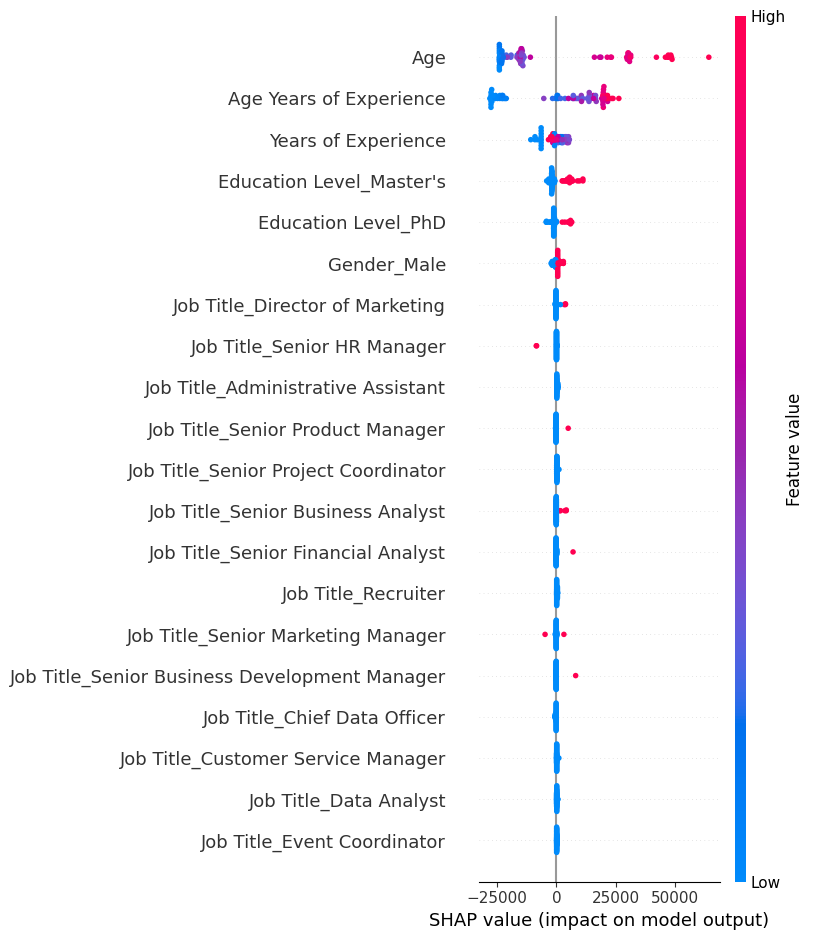

In [13]:
import shap

# SHAP for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [14]:
import sys
!{sys.executable} -m pip install lime


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import lime
import lime.lime_tabular

# LIME explainer banaye (XGBoost model ke liye)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

# Kisi ek test sample ko explain karo (e.g., pehla test sample)
i = 0  # ya koi bhi index
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=xgb_model.predict
)

# Notebook me explanation show karo
exp.show_in_notebook(show_table=True)

c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\AkashK\AppData\Local\Programs\Python\Python39\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("XGBoost Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

XGBoost Cross-Validation R2 Scores: [0.83221409 0.73407177 0.93830509 0.94577627 0.92951303]
Mean CV R2: 0.8759760519965057


In [17]:
import joblib

# Save model
joblib.dump(xgb_model, 'xgb_salary_model.pkl')

# Load model
loaded_model = joblib.load('xgb_salary_model.pkl')

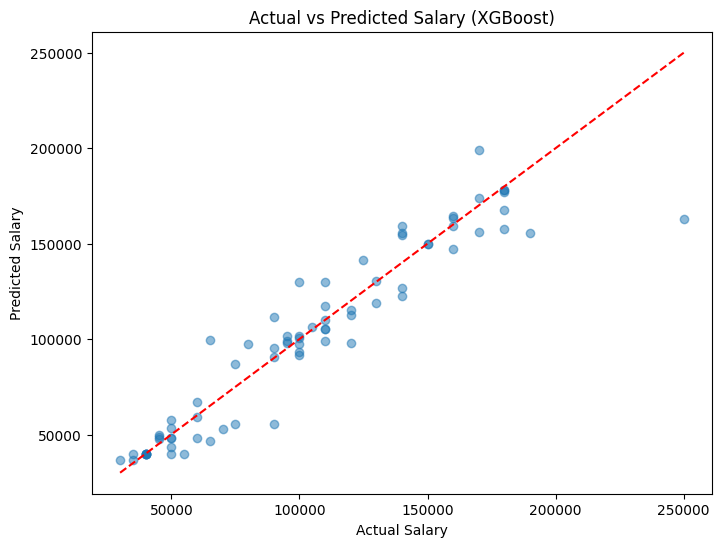

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
print("Best RF Params:", grid.best_params_)
print("Best RF R2 (CV):", grid.best_score_)

Best RF Params: {'max_depth': 10, 'n_estimators': 100}
Best RF R2 (CV): 0.8768820734994263


Best Model: Random Forest


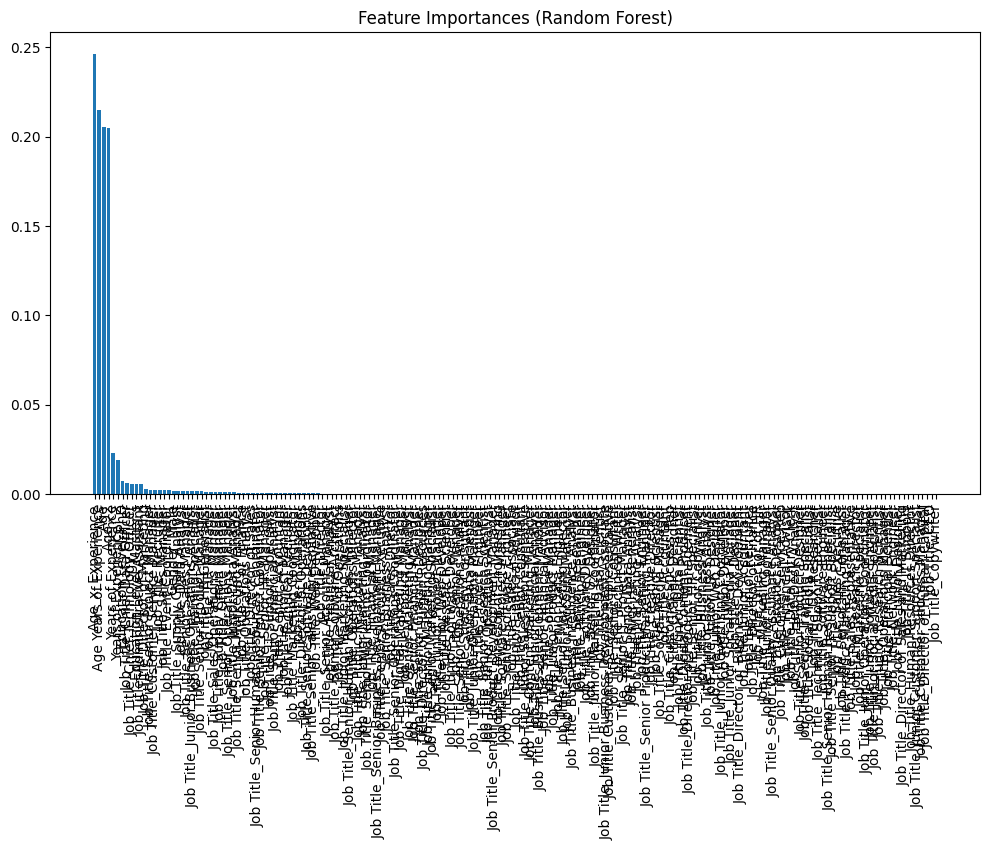

In [20]:
# 6. Feature Importance (Random Forest Example)
best_model_name = results_df.sort_values('R2 Score', ascending=False).iloc[0]['Model']
print(f'Best Model: {best_model_name}')
if best_model_name == 'Random Forest':
    best_model = models['Random Forest']
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12,6))
    plt.title('Feature Importances (Random Forest)')
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()

In [21]:
# 7. Predict Salary for a New Employee (Example)
# (You can change these values as needed)
new_employee = {
    'Age': 30,
    'Years of Experience': 5,
    'Gender_Male': 1,
    'Education Level_Master\'s': 1,
    'Education Level_PhD': 0,
    # Add all Job Title columns as 0 except the one you want as 1
    # Example for 'Job Title_Software Engineer':
    'Job Title_Software Engineer': 1,
    # All other job titles as 0...
}
# Fill missing columns with 0
# Fill missing columns with 0 and ensure correct order
def fill_and_order_cols(d, columns):
    for col in columns:
        if col not in d:
            d[col] = 0
    # Remove any extra keys not in columns
    d = {k: d[k] for k in columns}
    return d

new_employee = fill_and_order_cols(new_employee, X.columns)
new_employee_df = pd.DataFrame([new_employee], columns=X.columns)
# Predict with best model
if best_model_name in models:
    best_model = models[best_model_name]
    predicted_salary = best_model.predict(new_employee_df)[0]
    print(f'Predicted Salary for New Employee: {predicted_salary:.2f}')

Predicted Salary for New Employee: 45250.00


In [22]:
from scipy import stats
residuals = y_test - predictions[best_model_name]
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test results — Statistic: {shapiro_test.statistic}, p-Value: {shapiro_test.pvalue}')

Shapiro-Wilk test results — Statistic: 0.9040049101747966, p-Value: 3.156273248131024e-05
